In [52]:
!pip install aitextgen
!pip install language-tool-python
!pip install matplotlib

In [57]:
# external packages
from aitextgen.TokenDataset import TokenDataset
from aitextgen.tokenizers import train_tokenizer
from aitextgen.utils import GPT2ConfigCPU
from aitextgen import aitextgen
import matplotlib.pyplot as plt
import language_tool_python

# standard libraries
import pickle
from io import StringIO
import sys


Load the model from a pickle file

In [3]:
with open("my_model.pkl", "rb") as input_file:
  ai = pickle.load(input_file)

Generate 500 outputs from the model and store them in a a list for later analysis. You can change the size of generated data as needed.

In [47]:
results = StringIO()
sys.stdout = results
ai.generate(500)
output_string = results.getvalue()
results_list = output_string.split("\n==========\n")

Preprocess the text in the output list to remove new line and tab characters and count the number of typos and gramatical mistakes in the text. The error counts and length of text are stored in a separate list in a tuple format.

The following code is somewhat time consuming. Expect it to run for few minutes.

In [48]:
# set up the grammar tool
grammar_tool = language_tool_python.LanguageTool('en-US')

In [49]:
data_results = []
for item in results_list:
  item.replace("\n", " ")
  item.replace("\t", "")
  item_length = len(item)
  error_count = len(grammar_tool.check(item))
  data_results.append((error_count, item_length))


Graph data_results as a scatter plot to show the various datapoints.

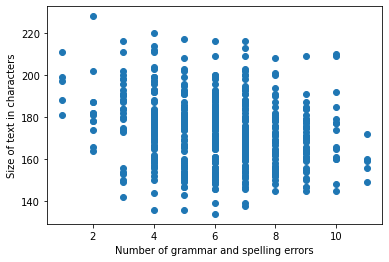

In [66]:
plt.scatter(*zip(*data_results))
plt.xlabel("Number of grammar and spelling errors")
plt.ylabel("Size of text in characters")
plt.savefig("plot.png")
plt.show()


Calculate error frequency for the entire dataset. Overall error frequency is calculated by dividing the total number of errors by the total number of characters in the generated data. The results will essentially say this: on average how many characters are generated before an error is encountered

In [69]:
error_total = 0
len_total = 0
for data_tuple in data_results:
  error_total += data_tuple[0]
  len_total += data_tuple[1]


error_freq = len_total/ error_total
f"Error frequency: {error_freq} characters per error"

'Error frequency: 28.78592764686359 characters per error'